# LOGISTIC REGRESSION


## Step 1: Import Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import math
%matplotlib inline


## Step 2:Import Dataset

In [74]:
ldata=pd.read_csv(r'''C:\Users\Neha\Downloads\train.csv''')

In [75]:
ldata.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,Unmarried,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Married,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Married,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Married,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,Unmarried,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Married,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Married,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Married,3.0,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Married,2.0,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Married,1.0,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


## Step 3: Data Preprocessing 

### *Analyzing Data

In [76]:
ldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null float64
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(5), int64(1), object(7)
memory usage: 62.4+ KB


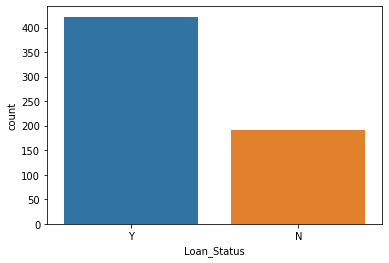

In [77]:
sb.countplot(x="Loan_Status",data=ldata)

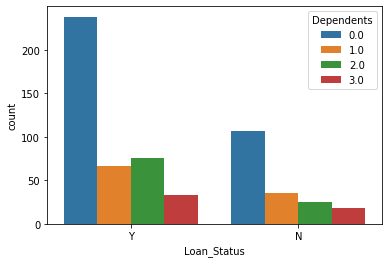

In [78]:
sb.countplot(x="Loan_Status",hue="Dependents",data=ldata)

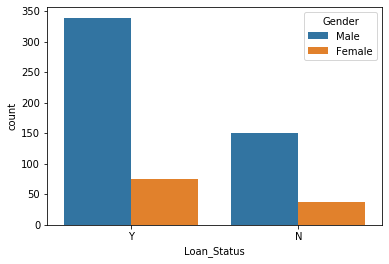

In [79]:
sb.countplot(x="Loan_Status",hue="Gender",data=ldata)

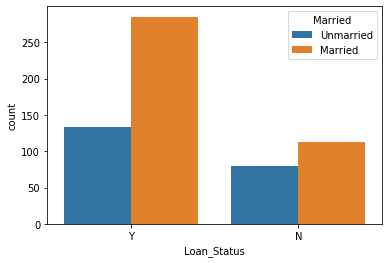

In [80]:
sb.countplot(x="Loan_Status",hue="Married",data=ldata)

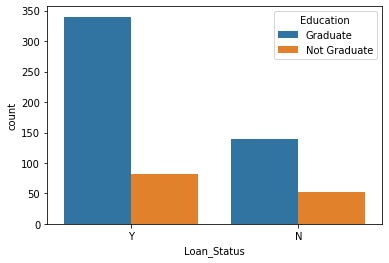

In [81]:
sb.countplot(x="Loan_Status",hue="Education",data=ldata)

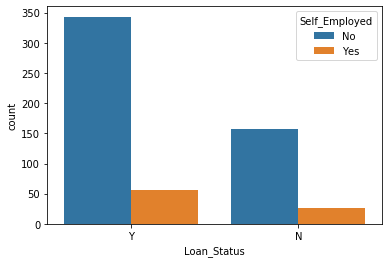

In [82]:
sb.countplot(x="Loan_Status",hue="Self_Employed",data=ldata)

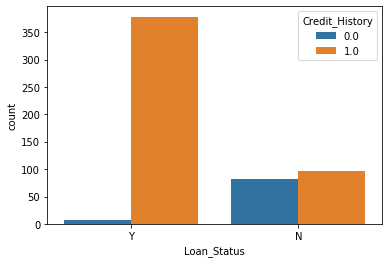

In [83]:
sb.countplot(x="Loan_Status",hue="Credit_History",data=ldata)

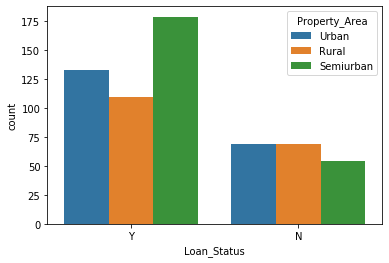

In [84]:
sb.countplot(x="Loan_Status",hue="Property_Area",data=ldata)

### * Data Wrangling

In [85]:
ldata.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
ldata.drop("Credit_History",axis=1,inplace=True)

In [87]:
ldata.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status
0,LP001002,Male,Unmarried,0.0,Graduate,No,5849,0.0,NaN,360.0,Urban,Y
1,LP001003,Male,Married,1.0,Graduate,No,4583,1508.0,128.0,360.0,Rural,N
2,LP001005,Male,Married,0.0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y
3,LP001006,Male,Married,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y
4,LP001008,Male,Unmarried,0.0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y


In [88]:
ldata.dropna(inplace=True)

In [89]:
ldata.shape

(523, 12)

In [90]:
ldata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Property_Area        0
Loan_Status          0
dtype: int64

## Step 3:Convert all string variables to Categorical Variables/Dummy Variables

### 1.GENDER

In [91]:
ge=pd.get_dummies(ldata['Gender'],drop_first=True)
ge.head(5)

,Male
1,1
2,1
3,1
4,1
5,1


In [92]:
ldata=pd.concat([ldata,ge],axis=1)
ldata.drop(['Gender'],axis=1,inplace=True)

In [93]:
ldata

,Loan_ID,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male
1,LP001003,Married,1.0,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,1
2,LP001005,Married,0.0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,1
3,LP001006,Married,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,1
4,LP001008,Unmarried,0.0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,1
5,LP001011,Married,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y,1
6,LP001013,Married,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,Urban,Y,1
7,LP001014,Married,3.0,Graduate,No,3036,2504.0,158.0,360.0,Semiurban,N,1
8,LP001018,Married,2.0,Graduate,No,4006,1526.0,168.0,360.0,Urban,Y,1
9,LP001020,Married,1.0,Graduate,No,12841,10968.0,349.0,360.0,Semiurban,N,1
10,LP001024,Married,2.0,Graduate,No,3200,700.0,70.0,360.0,Urban,Y,1


### 2.Married

In [94]:
ma=pd.get_dummies(ldata['Married'],drop_first=True)
ma.head(5)

,Unmarried
1,0
2,0
3,0
4,1
5,0


In [95]:
ldata=pd.concat([ldata,ma],axis=1)
ldata.drop(['Married'],axis=1,inplace=True)

In [96]:
ldata

,Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Unmarried
1,LP001003,1.0,Graduate,No,4583,1508.0,128.0,360.0,Rural,N,1,0
2,LP001005,0.0,Graduate,Yes,3000,0.0,66.0,360.0,Urban,Y,1,0
3,LP001006,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,Urban,Y,1,0
4,LP001008,0.0,Graduate,No,6000,0.0,141.0,360.0,Urban,Y,1,1
5,LP001011,2.0,Graduate,Yes,5417,4196.0,267.0,360.0,Urban,Y,1,0
6,LP001013,0.0,Not Graduate,No,2333,1516.0,95.0,360.0,Urban,Y,1,0
7,LP001014,3.0,Graduate,No,3036,2504.0,158.0,360.0,Semiurban,N,1,0
8,LP001018,2.0,Graduate,No,4006,1526.0,168.0,360.0,Urban,Y,1,0
9,LP001020,1.0,Graduate,No,12841,10968.0,349.0,360.0,Semiurban,N,1,0
10,LP001024,2.0,Graduate,No,3200,700.0,70.0,360.0,Urban,Y,1,0


### 3.Education

In [97]:
gr=pd.get_dummies(ldata['Education'],drop_first=True)
gr.head(5)

,Not Graduate
1,0
2,0
3,1
4,0
5,0


In [98]:
ldata=pd.concat([ldata,gr],axis=1)
ldata.drop(['Education'],axis=1,inplace=True)

In [99]:
ldata

,Loan_ID,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Unmarried,Not Graduate
1,LP001003,1.0,No,4583,1508.0,128.0,360.0,Rural,N,1,0,0
2,LP001005,0.0,Yes,3000,0.0,66.0,360.0,Urban,Y,1,0,0
3,LP001006,0.0,No,2583,2358.0,120.0,360.0,Urban,Y,1,0,1
4,LP001008,0.0,No,6000,0.0,141.0,360.0,Urban,Y,1,1,0
5,LP001011,2.0,Yes,5417,4196.0,267.0,360.0,Urban,Y,1,0,0
6,LP001013,0.0,No,2333,1516.0,95.0,360.0,Urban,Y,1,0,1
7,LP001014,3.0,No,3036,2504.0,158.0,360.0,Semiurban,N,1,0,0
8,LP001018,2.0,No,4006,1526.0,168.0,360.0,Urban,Y,1,0,0
9,LP001020,1.0,No,12841,10968.0,349.0,360.0,Semiurban,N,1,0,0
10,LP001024,2.0,No,3200,700.0,70.0,360.0,Urban,Y,1,0,0


### 4.Self Employed

In [100]:
se=pd.get_dummies(ldata['Self_Employed'],drop_first=True)
se.head(5)

,Yes
1,0
2,1
3,0
4,0
5,1


In [101]:
ldata=pd.concat([ldata,se],axis=1)
ldata.drop(['Self_Employed'],axis=1,inplace=True)

In [102]:
ldata

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Property_Area,Loan_Status,Male,Unmarried,Not Graduate,Yes
1,LP001003,1.0,4583,1508.0,128.0,360.0,Rural,N,1,0,0,0
2,LP001005,0.0,3000,0.0,66.0,360.0,Urban,Y,1,0,0,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,Urban,Y,1,0,1,0
4,LP001008,0.0,6000,0.0,141.0,360.0,Urban,Y,1,1,0,0
5,LP001011,2.0,5417,4196.0,267.0,360.0,Urban,Y,1,0,0,1
6,LP001013,0.0,2333,1516.0,95.0,360.0,Urban,Y,1,0,1,0
7,LP001014,3.0,3036,2504.0,158.0,360.0,Semiurban,N,1,0,0,0
8,LP001018,2.0,4006,1526.0,168.0,360.0,Urban,Y,1,0,0,0
9,LP001020,1.0,12841,10968.0,349.0,360.0,Semiurban,N,1,0,0,0
10,LP001024,2.0,3200,700.0,70.0,360.0,Urban,Y,1,0,0,0


### 5.Property Area

In [103]:
pa=pd.get_dummies(ldata['Property_Area'],drop_first=True)
pa.head(5)

,Semiurban,Urban
1,0,0
2,0,1
3,0,1
4,0,1
5,0,1


In [104]:
ldata=pd.concat([ldata,pa],axis=1)
ldata.drop(['Property_Area'],axis=1,inplace=True)

In [105]:
ldata

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Loan_Status,Male,Unmarried,Not Graduate,Yes,Semiurban,Urban
1,LP001003,1.0,4583,1508.0,128.0,360.0,N,1,0,0,0,0,0
2,LP001005,0.0,3000,0.0,66.0,360.0,Y,1,0,0,1,0,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,Y,1,0,1,0,0,1
4,LP001008,0.0,6000,0.0,141.0,360.0,Y,1,1,0,0,0,1
5,LP001011,2.0,5417,4196.0,267.0,360.0,Y,1,0,0,1,0,1
6,LP001013,0.0,2333,1516.0,95.0,360.0,Y,1,0,1,0,0,1
7,LP001014,3.0,3036,2504.0,158.0,360.0,N,1,0,0,0,1,0
8,LP001018,2.0,4006,1526.0,168.0,360.0,Y,1,0,0,0,0,1
9,LP001020,1.0,12841,10968.0,349.0,360.0,N,1,0,0,0,1,0
10,LP001024,2.0,3200,700.0,70.0,360.0,Y,1,0,0,0,0,1


### 6.Loan Status

In [106]:
ls=pd.get_dummies(ldata['Loan_Status'],drop_first=True)
ls.head(5)

,Y
1,0
2,1
3,1
4,1
5,1


In [107]:
ldata=pd.concat([ldata,ls],axis=1)
ldata.drop(['Loan_Status'],axis=1,inplace=True)

In [108]:
ldata

,Loan_ID,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Male,Unmarried,Not Graduate,Yes,Semiurban,Urban,Y
1,LP001003,1.0,4583,1508.0,128.0,360.0,1,0,0,0,0,0,0
2,LP001005,0.0,3000,0.0,66.0,360.0,1,0,0,1,0,1,1
3,LP001006,0.0,2583,2358.0,120.0,360.0,1,0,1,0,0,1,1
4,LP001008,0.0,6000,0.0,141.0,360.0,1,1,0,0,0,1,1
5,LP001011,2.0,5417,4196.0,267.0,360.0,1,0,0,1,0,1,1
6,LP001013,0.0,2333,1516.0,95.0,360.0,1,0,1,0,0,1,1
7,LP001014,3.0,3036,2504.0,158.0,360.0,1,0,0,0,1,0,0
8,LP001018,2.0,4006,1526.0,168.0,360.0,1,0,0,0,0,1,1
9,LP001020,1.0,12841,10968.0,349.0,360.0,1,0,0,0,1,0,0
10,LP001024,2.0,3200,700.0,70.0,360.0,1,0,0,0,0,1,1


## Step 4:Split the dataset into Training and Testing dataset

In [109]:
ldata.drop(['Loan_ID'],axis=1,inplace=True)

In [112]:
x=ldata.drop("Y",axis=1)
y=ldata["Y"]

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

### Step 5:Building the Model 

In [115]:
def hypothesis(a,b,x):
    return a * x  + b

In [116]:
def error(a,b,x,y):
    e = 0
    m = len(y)
    for i in range(m):
        e += np.power((hypothesis(a,b,x[i]) - y[i]), 2)
    
    return (1/(2 * m)) * e

In [117]:
def step_gradient(a,b,x,y,learning_rate):
    grad_a = 0
    grad_b = 0
    m = len(x)
    for i in range(m):
        grad_a += 1/m * (hypothesis(a,b,x[i]) - y[i]) * x[i]
        grad_b += 1/m * (hypothesis(a,b,x[i]) - y[i])
    
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    
    return a, b

In [118]:
def descend(initial_a, initial_b, x, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    for i in range(iterations):
        e = error(a, b, x ,y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}")
        
        a, b = step_gradient(a, b, x, y, learning_rate)

    return a, b

In [119]:
a = 0
b = 1
learning_rate = 0.01
iterations = 10000

final_a, final_b = descend(a, b, x_train, y_train, learning_rate, iterations)

KeyError: 0

In [121]:
from sklearn.linear_model import LogisticRegression

In [122]:
logmodel=LogisticRegression()

In [123]:
logmodel.fit(x_train,y_train)

C:\Users\Neha\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
predictions=logmodel.predict(x_test)

In [126]:
from sklearn.metrics import accuracy_score

In [127]:
accuracy_score(y_test,predictions)

0.7428571428571429